### WorkShop: Árbol de Decisión modelo de Clasificación en Scikit-Learn

**Resolución**: EDA (Análisis Exploratorio de Datos)

In [1]:
# Punto 1) Importar las librerias (Ejemplo: pandas, numpy, matplotlib, etc.) y el DataSet propuesto.

# Importamos las librerias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importamos el DataSet.
df = pd.read_csv("C:/Users/Joshua/Desktop/Archivos y Anotaciones/Mis Documentos/Educacion/Argentina Programa/Procesamiento de Datos con Python/Modulo 5/Titanic.csv", sep = ",")

In [2]:
# Punto 2) Imprimir las primeras 5 lineas.

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [3]:
# Punto 3) Imprimir las ultimas 5 lineas.

df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch
709,0,3,1,39.0,0,5
710,0,2,0,27.0,0,0
711,1,1,1,19.0,0,0
712,1,1,0,26.0,0,0
713,0,3,0,32.0,0,0


In [4]:
# Punto 4) Imprimir las dimensiones del DataSet.

print(df.shape)

(714, 6)


In [5]:
# Punto 5) Obtener la totalidad de registros por columna.

df.count()

Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
dtype: int64

In [6]:
# Punto 6) Analizar el tipo de dato de cada columna.

df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [7]:
# Punto 7) Obtener el tipo de estructura del DataSet.

type(df)

pandas.core.frame.DataFrame

In [8]:
# Punto 8) Listar los nombres de las columnas.

print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')


**Resolución**: Machine Learning - Modelo de Clasificación

In [9]:
# Punto 9) Separar los features en una variable X y la variable target en Y.

# Nuestro target sera Survived.
X = df.drop("Survived", axis = 1) # Elimino de mi DataSet la variable a predecir. 
Y = df.Survived # Defino el target.

In [10]:
# Punto 10) Separar los datos en Train (70 %) y Test (30 %) con un random_state = 42.

# Importamos la libreria que nos permite separar la data en Train y Test.
# sklearn es la libreria principal de Python para ML.
# train_test_split es la libreria que nos permite separar la data en Train y Test.
from sklearn.model_selection import train_test_split

# Me quedo con 30% para Test y 70% para Train.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [11]:
# Punto 11) Crear un objeto Arbol de Decision para un modelo de clasificacion, con los siguientes parametros predefinidos.
    # Nivel de profundidad = 2 -> Para eso es el max_depth = 2.
    # Semilla para la reproducibilidad = 42 -> Para eso es el random_state = 42.

# Importamos la libreria que nos permite usar el Arbol de Decision para un modelo de clasificacion.
from sklearn.tree import DecisionTreeClassifier

# Cremos el modelo arbol.
Tree = DecisionTreeClassifier(max_depth = 2, random_state = 42)

In [15]:
# Punto 12) Entrenar el modelo creado.
# fit funcion para entrenar el modelo.

# Entrenamos el modelo.
Tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
# Punto 13) Realizar la prediccion del modelo en Train y Test.

Y_train_pred = Tree.predict(X_train) # Prediccion en Train.
Y_test_pred = Tree.predict(X_test) # Prediccion en Test.

In [18]:
# Punto 14) Calcular la metrica de Accuracy en Train y Test para la comparacion posterior de los modelos.

# Importamos la libreria que tiene todas las metricas.
from sklearn.metrics import accuracy_score

# Calculamos el Accurancy en Train.
train_accuracy = accuracy_score(Y_train, Y_train_pred)
# Calculamos el Accurancy en Test.
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Imprimimos los resultados.
print("Porcentaje de acierto sobre el set de entrenamiento: ", train_accuracy)
print("Porcentaje de acierto sobre el set de evaluacion: ", test_accuracy)

Porcentaje de acierto sobre el set de entrenamiento:  0.8096192384769539
Porcentaje de acierto sobre el set de evaluacion:  0.786046511627907


NOTA:
    - El accuracy va de 0 a 1.
    - Cuanto mas cerca del 1, es un valor positivo.
    - Entre mas similares sean los valores de entrenamiento y evaluacion, mejor.

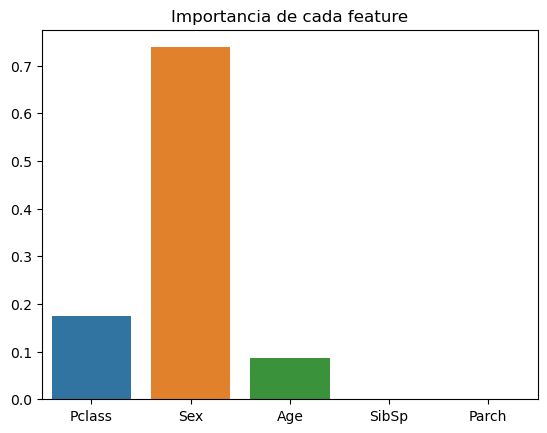

In [24]:
# Punto 15) Graficar las variables de importancia del Arbol de Decision creado. (feature_importances_)

# Importamos la libreria para hacer graficos en Python.
import seaborn as sns

# Del arbol nos quedamos con los features importantes.
Importances = Tree.feature_importances_
# Nos quedamos con los titulares.
Columns = X.columns

# Creamos el grafico y lo mostramos.
sns.barplot(x = Columns, y = Importances)
plt.title("Importancia de cada feature")
plt.show()

La variable mas relevante para nuestro algoritmo de clasificacion fue Sex, luego Pclass y por ultimo Age.